# Description: 
Airfares and passengers for U.S. Domestic Routes
for 4th Quarter of 2002.

# Variables/Columns

City1   1-3

City2   5-7

Average Fare    11-17

Distance      20-23

Average weekly passengers   26-33

market leading airline    36-37

market share     40-45

Average fare    48-54

Low price airline   57-58

market share    61-66

price     69-75

# Source: 
U.S. Department of Transportation

# 1. Reading Source File and Checking Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
#reading source file
file=pd.read_csv("http://users.stat.ufl.edu/~winner/data/airq402.dat", sep='\s+'  , engine='python')

In [3]:
# Adding colunm names as mentioned in data file
file.columns = ['City1', 'City2', 'Average Flight Fare', 'Distance','Average Weekly Passengers','Market Leading Airline (MLA)',
               'Market Share MLA', 'Average MLA Fare', 'Low Price Airline (LPA)', 'Market Share LPA', 'Average LPA Fare']

In [4]:
file.head()

,City1,City2,Average Flight Fare,Distance,Average Weekly Passengers,Market Leading Airline (MLA),Market Share MLA,Average MLA Fare,Low Price Airline (LPA),Market Share LPA,Average LPA Fare
0,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
1,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
2,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
3,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42
4,ALB,FLL,135.17,1204,199.02,WN,40.68,137.97,DL,17.09,127.69


# 2. Data Cleaning

In [5]:
# getting total number of rows and column in the dataframe
print(f" Shape of the dataframe = {file.shape}")
totalrows=file.shape[0]
print(f" Total number of rows in the dataset =  {totalrows}")

 Shape of the dataframe = (999, 11)
 Total number of rows in the dataset =  999


In [6]:
# Checking Null colunms
file_nullcols = file.isnull().sum()
file_nullcols

# No null values are found

City1                           0
City2                           0
Average Flight Fare             0
Distance                        0
Average Weekly Passengers       0
Market Leading Airline (MLA)    0
Market Share MLA                0
Average MLA Fare                0
Low Price Airline (LPA)         0
Market Share LPA                0
Average LPA Fare                0
dtype: int64

In [7]:
# Checking data type of each colunm to check if any type needs to be changed
file.dtypes

City1                            object
City2                            object
Average Flight Fare             float64
Distance                          int64
Average Weekly Passengers       float64
Market Leading Airline (MLA)     object
Market Share MLA                float64
Average MLA Fare                float64
Low Price Airline (LPA)          object
Market Share LPA                float64
Average LPA Fare                float64
dtype: object

In [8]:
# Checking basic details of the data
file.describe()

,Average Flight Fare,Distance,Average Weekly Passengers,Market Share MLA,Average MLA Fare,Market Share LPA,Average LPA Fare
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,163.424374,1057.502503,672.527107,60.118519,166.703233,34.515806,143.225285
std,55.371544,643.307320,766.863056,19.374859,62.666775,27.087067,47.241860
min,50.520000,108.000000,181.410000,17.680000,50.520000,1.060000,49.610000
25%,126.025000,554.000000,257.115000,46.510000,124.120000,13.190000,113.825000
50%,161.360000,919.000000,404.780000,59.060000,161.440000,26.120000,137.830000
75%,197.435000,1455.000000,770.265000,73.520000,203.105000,52.950000,168.540000
max,401.230000,2724.000000,8950.760000,100.000000,490.030000,100.000000,387.940000


In [9]:
# Mean of distance, Average Weekly Passengers, Market share is above median
#These prima facie seem to have outliers

In [10]:
import pandas as pd
from pycaret.regression import *


# Initialize the setup
regression_setup = setup(data=file, target='Average LPA Fare', session_id=123)

# Compare all models
best_model = compare_models()

,Description,Value
0,Session id,123
1,Target,Average LPA Fare
2,Target type,Regression
3,Original data shape,"(999, 11)"
4,Transformed data shape,"(999, 43)"
5,Transformed train set shape,"(699, 43)"
6,Transformed test set shape,"(300, 43)"
7,Numeric features,6
8,Categorical features,4
9,Preprocess,True


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,9.7031,276.5396,16.3789,0.8733,0.0984,0.0641,0.1640
rf,Random Forest Regressor,9.9843,276.5308,16.3757,0.8729,0.1001,0.0671,0.1970
gbr,Gradient Boosting Regressor,10.5038,276.8352,16.3900,0.8720,0.1022,0.0715,0.1060
lightgbm,Light Gradient Boosting Machine,10.8357,305.6844,17.2475,0.8580,0.1062,0.0737,20.1800
ada,AdaBoost Regressor,14.1101,375.6619,19.2209,0.8271,0.1312,0.1045,0.0850
ridge,Ridge Regression,14.1221,396.4895,19.7684,0.8149,0.1347,0.1033,0.0460
lr,Linear Regression,14.2116,405.5676,20.0206,0.8102,0.1387,0.1040,0.3000
en,Elastic Net,14.5321,420.5057,20.3214,0.8043,0.1410,0.1078,0.0460
llar,Lasso Least Angle Regression,14.5101,420.6830,20.3247,0.8043,0.1411,0.1076,0.0420
lasso,Lasso Regression,14.5101,420.6833,20.3247,0.8043,0.1411,0.1076,0.0440


In [11]:
# Create a Linear Regression model
lr_model = create_model('lr')


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,13.1620,296.6916,17.2247,0.8282,0.1242,0.0979
1,16.7367,636.9101,25.2371,0.8005,0.1445,0.1104
2,13.1899,330.9244,18.1913,0.8227,0.1633,0.0991
3,13.6337,388.9367,19.7215,0.7936,0.1460,0.1074
4,13.0567,395.4397,19.8857,0.7709,0.1333,0.0993
5,14.9747,387.7068,19.6903,0.8349,0.1285,0.1029
6,12.5750,318.7174,17.8527,0.8586,0.1287,0.0971
7,14.9643,388.3159,19.7057,0.8510,0.1358,0.1075
8,14.8624,477.3533,21.8484,0.7546,0.1521,0.1100


In [12]:
# Tune the Linear Regression model
tuned_lr_model = tune_model(lr_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,13.1620,296.6916,17.2247,0.8282,0.1242,0.0979
1,16.7367,636.9101,25.2371,0.8005,0.1445,0.1104
2,13.1899,330.9244,18.1913,0.8227,0.1633,0.0991
3,13.6337,388.9367,19.7215,0.7936,0.1460,0.1074
4,13.0567,395.4397,19.8857,0.7709,0.1333,0.0993
5,14.9747,387.7068,19.6903,0.8349,0.1285,0.1029
6,12.5750,318.7174,17.8527,0.8586,0.1287,0.0971
7,14.9643,388.3159,19.7057,0.8510,0.1358,0.1075
8,14.8624,477.3533,21.8484,0.7546,0.1521,0.1100


Fitting 10 folds for each of 2 candidates, totalling 20 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [13]:
# Evaluate the tuned model
evaluate_model(tuned_lr_model)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [15]:
# Finalize the model
final_lr_model = finalize_model(tuned_lr_model)
print(final_lr_model)

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['Average Flight Fare', 'Distance',
                                             'Average Weekly Passengers',
                                             'Market Share MLA',
                                             'Average MLA Fare',
                                             'Market Share LPA'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['City1', 'City2',
                                             'Market Leading Airline (MLA)',
                                             'Low Price Airline (LPA)'...
                                                                    '(MLA)',
                                                                    'Low Price '
                                                                    'Airline '
               

# 3. EDA

## 3.1. Univariate Analysis

/tmp/ipykernel_5379/3414253163.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(file['Average Flight Fare'],color='green')
/tmp/ipykernel_5379/3414253163.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(file['Distance'],color='blue')
/tmp/ipykernel_5379/3414253163.py:14: UserWarning: 

`di

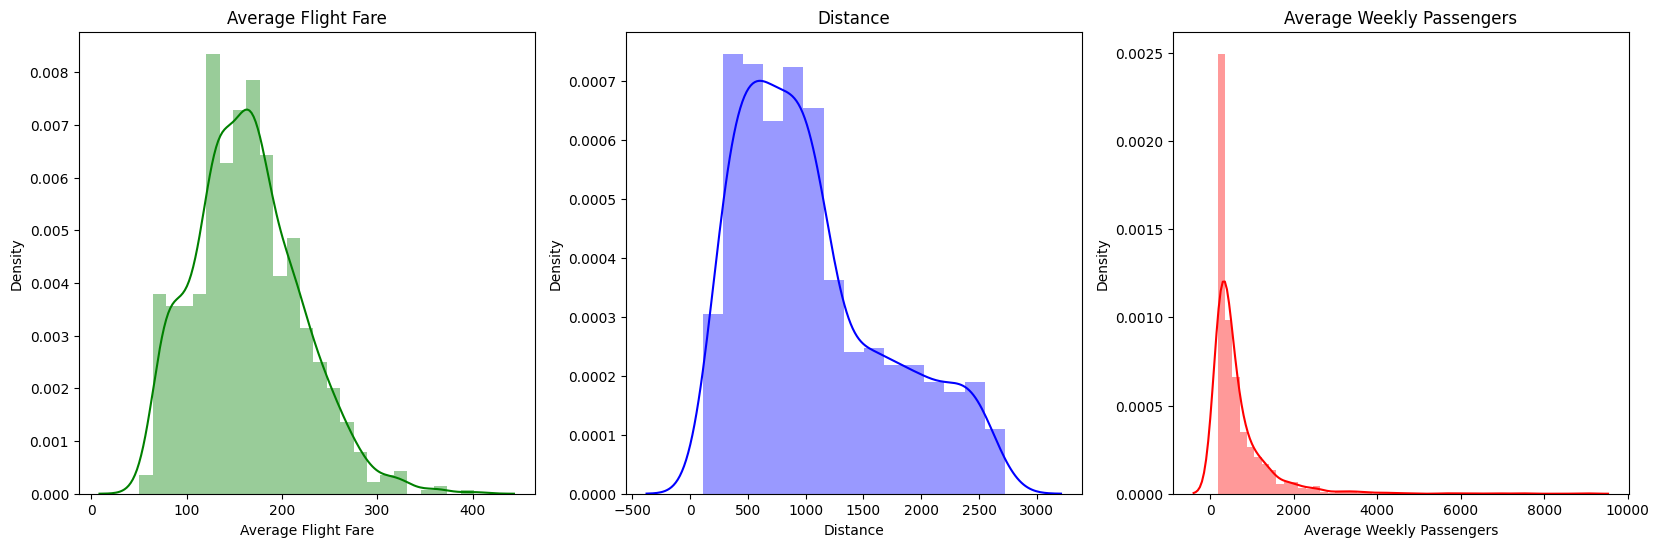

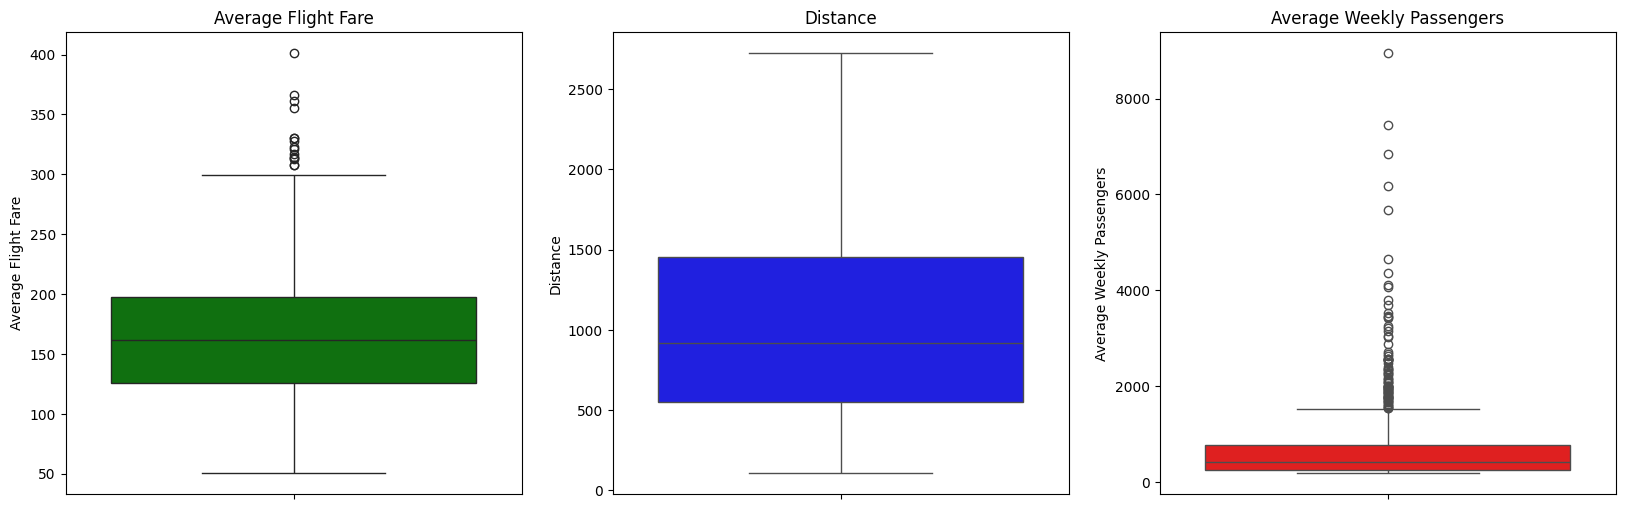

In [10]:
plt.figure(figsize=(20,6))
plt.subplot(1, 3, 1)
plt.title('Average Flight Fare')
sns.distplot(file['Average Flight Fare'],color='green')

# subplot 2
plt.subplot(1, 3, 2)
plt.title('Distance')
sns.distplot(file['Distance'],color='blue')

# subplot 3l
plt.subplot(1, 3, 3)
plt.title('Average Weekly Passengers')
sns.distplot(file['Average Weekly Passengers'],color='red')

plt.figure(figsize=(20,6))
plt.subplot(1, 3, 1)
plt.title('Average Flight Fare')
sns.boxplot(file['Average Flight Fare'],orient='vertical',color='green')

# subplot 2
plt.subplot(1, 3, 2)
plt.title('Distance')
sns.boxplot(file['Distance'],orient='vertical',color='blue')

# subplot 3
plt.subplot(1, 3, 3)
plt.title('Average Weekly Passengers')
sns.boxplot(file['Average Weekly Passengers'],orient='vertical',color='red')


plt.show()

##### Most of the flight fare lie between 100 to 300 with some outliers
##### Average distance ranges between 500 to 2500
##### Most of the time Average Weekly Passenger numer is less than 2000 but there are large number of outliers  

/tmp/ipykernel_5379/2198768784.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(file['Market Share MLA'],color='green')
/tmp/ipykernel_5379/2198768784.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(file['Average MLA Fare'],color='blue')
/tmp/ipykernel_5379/2198768784.py:14: UserWarning: 

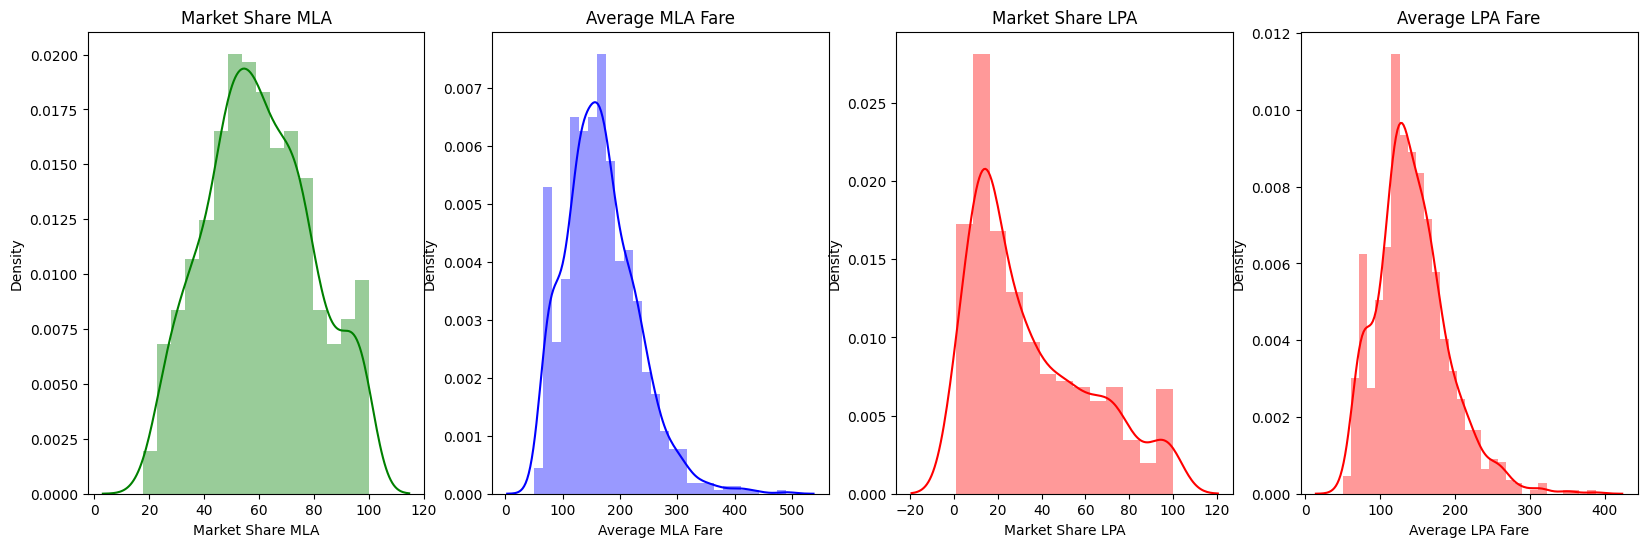

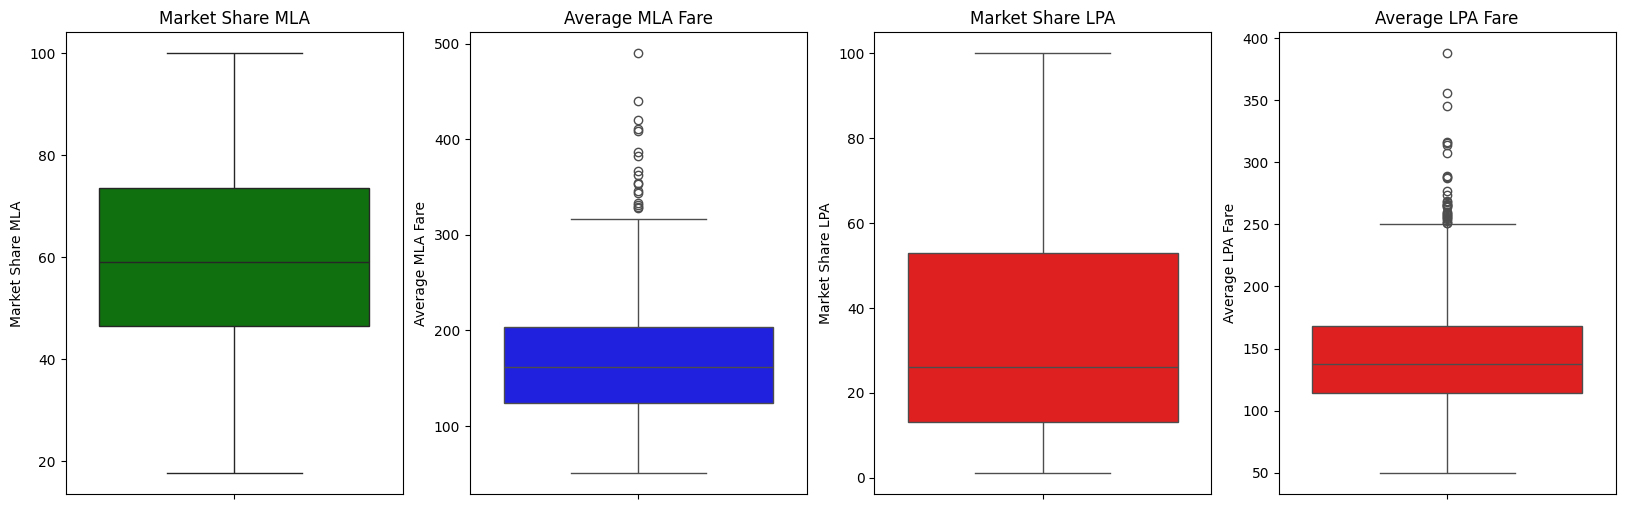

In [11]:
plt.figure(figsize=(20,6))
plt.subplot(1, 4, 1)
plt.title('Market Share MLA')
sns.distplot(file['Market Share MLA'],color='green')

# subplot 2
plt.subplot(1, 4, 2)
plt.title('Average MLA Fare')
sns.distplot(file['Average MLA Fare'],color='blue')

# subplot 3
plt.subplot(1, 4, 3)
plt.title('Market Share LPA')
sns.distplot(file['Market Share LPA'],color='red')

# subplot 4
plt.subplot(1, 4, 4)
plt.title('Average LPA Fare')
sns.distplot(file['Average LPA Fare'],color='red')


plt.figure(figsize=(20,6))
plt.subplot(1, 4, 1)
plt.title('Market Share MLA')
sns.boxplot(file['Market Share MLA'],orient='vertical',color='green')

# subplot 2
plt.subplot(1, 4, 2)
plt.title('Average MLA Fare')
sns.boxplot(file['Average MLA Fare'],orient='vertical',color='blue')

# subplot 3
plt.subplot(1, 4, 3)
plt.title('Market Share LPA')
sns.boxplot(file['Market Share LPA'],orient='vertical',color='red')

# subplot 4
plt.subplot(1, 4, 4)
plt.title('Average LPA Fare')
sns.boxplot(file['Average LPA Fare'],orient='vertical',color='red')



plt.show()

##### Average fare of both Market Leader and Low Price Airline range from 100 to 300 with some outliers
##### Market Leader has 40 to 80 percent market share on most routes
##### Lower Price airline has less than 40 percent market share on most of the routes

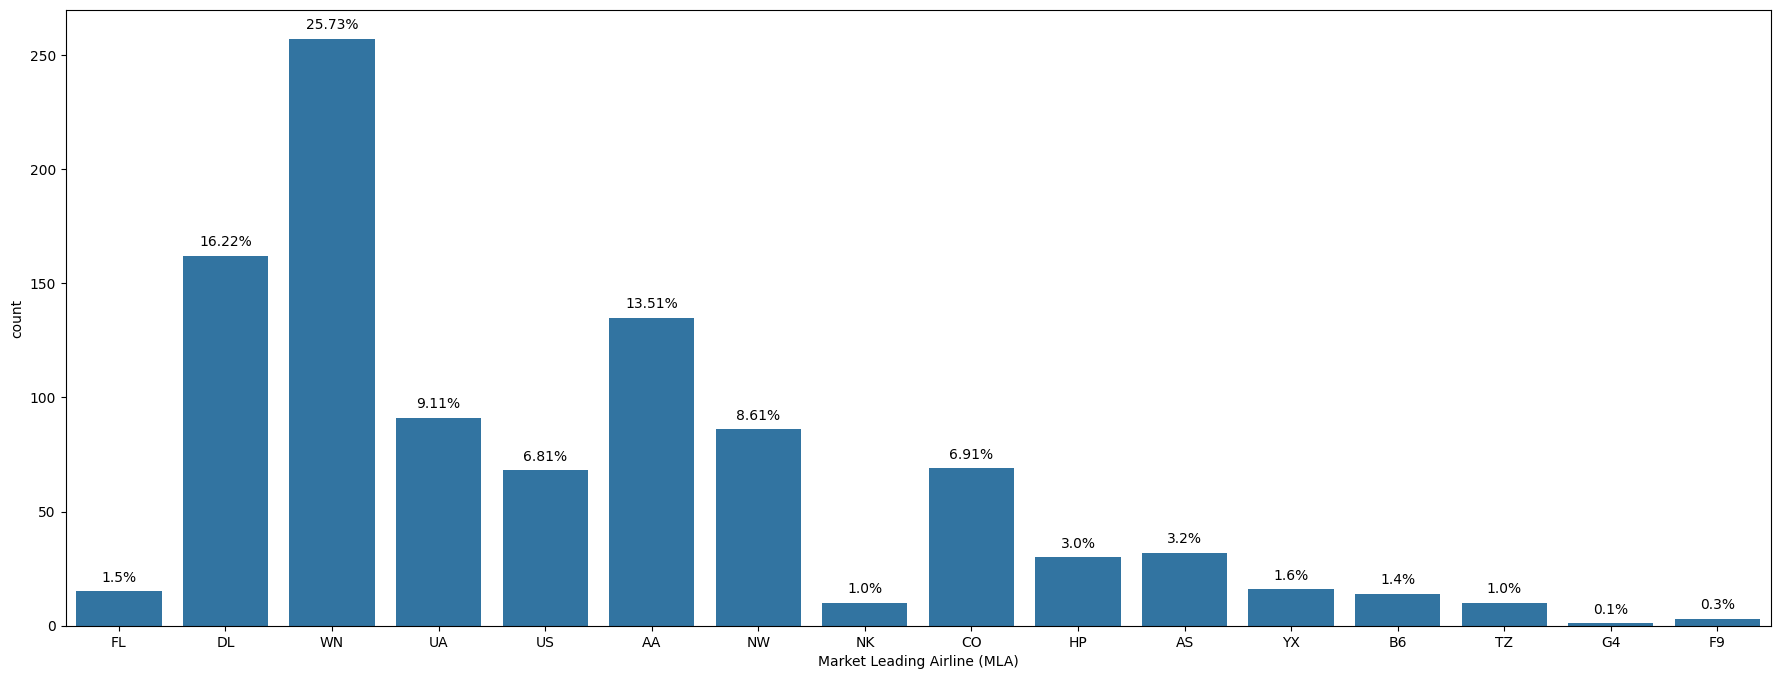

In [12]:
fig, ax = plt.subplots(figsize=(20,8))
width = len(file['Market Leading Airline (MLA)'].unique()) + 6
fig.set_size_inches(width , 8)
ax=sns.countplot(data = file, x= 'Market Leading Airline (MLA)') 



for p in ax.patches: 
    ax.annotate(str((np.round(p.get_height()/len(file)*100,decimals=2)))+'%', (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

##### WN followed by DL happens to be market leader airline on most of the routes

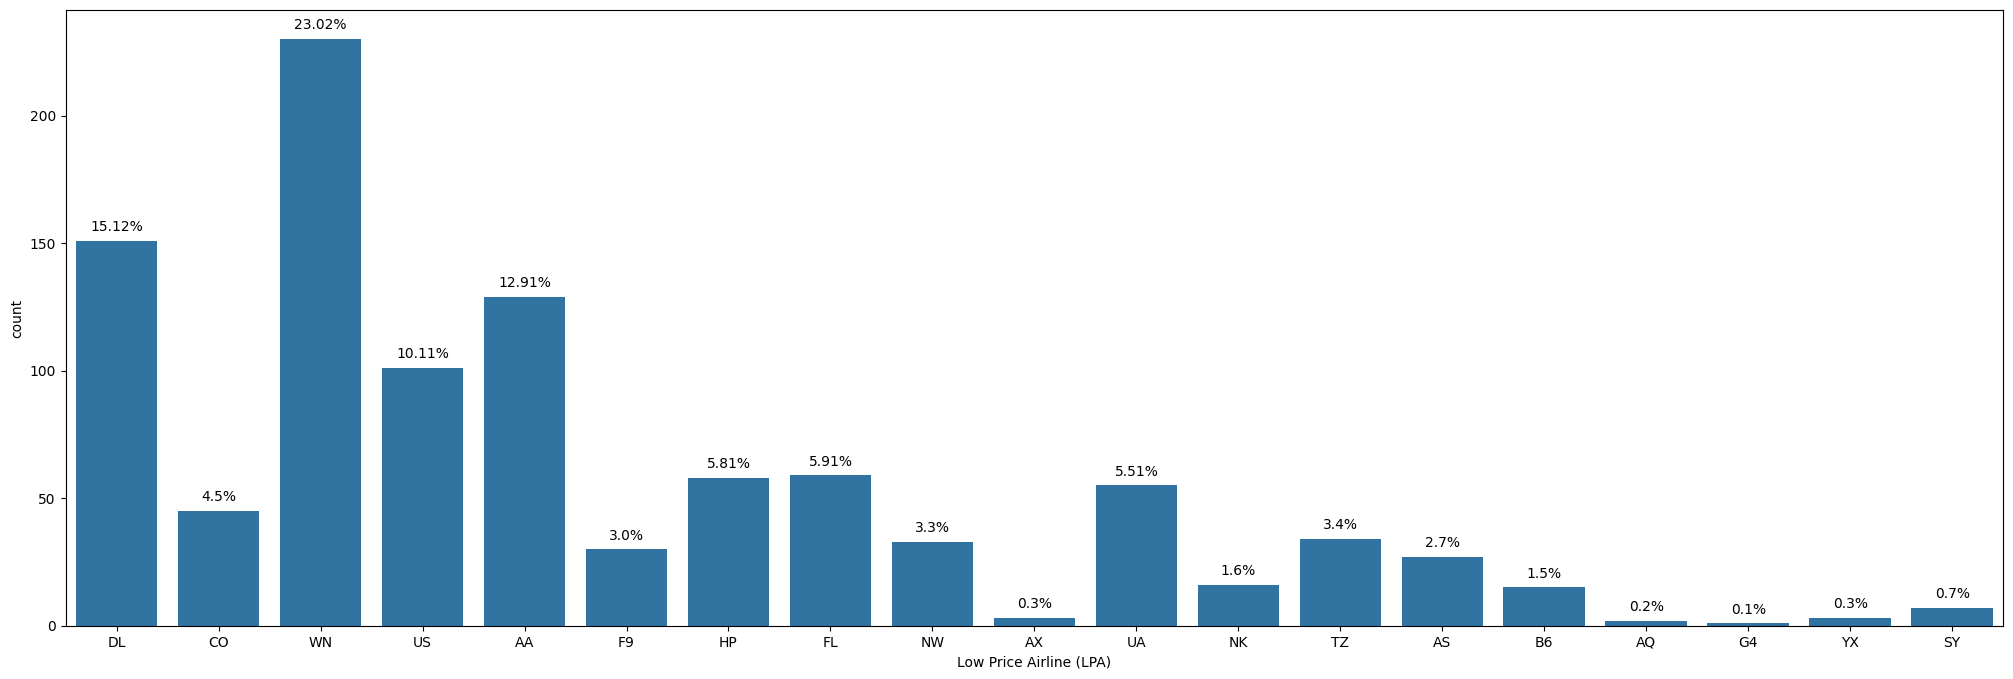

In [13]:
fig, ax = plt.subplots(figsize=(20,8))
width = len(file['Low Price Airline (LPA)'].unique()) + 6
fig.set_size_inches(width , 8)
ax=sns.countplot(data = file, x= 'Low Price Airline (LPA)') 



for p in ax.patches: 
    ax.annotate(str((np.round(p.get_height()/len(file)*100,decimals=2)))+'%', (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

In [14]:
##### WN followed by DL happens to be the low price airline on most routes

## 3.2. Bivariate Analysis

In [15]:
rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10, 10))
corr = file.corr()
corr.style.background_gradient(cmap='coolwarm')

ValueError: could not convert string to float: 'CAK'

#### Average Flight fare is most corelated to fare of market leader and low performing flight

<AxesSubplot:xlabel='Low Price Airline (LPA)', ylabel='Average Flight Fare'>

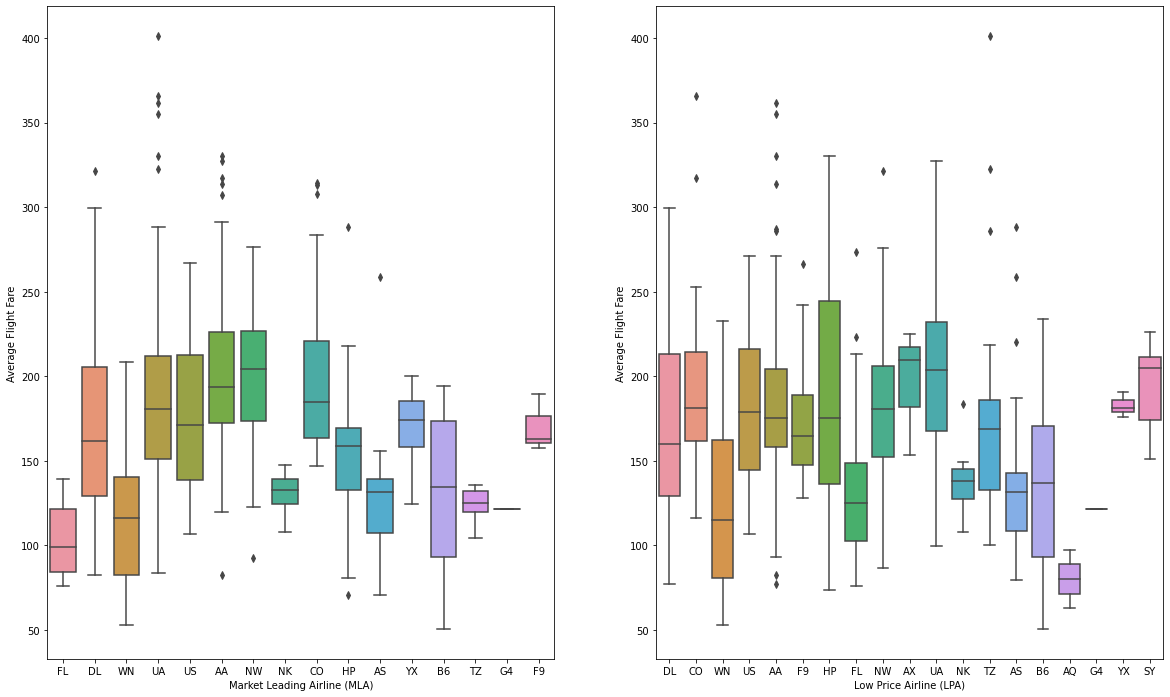

In [ ]:
plt.figure(figsize=(20, 12))
plt.subplot(1,2,1)
sns.boxplot(x = 'Market Leading Airline (MLA)', y = 'Average Flight Fare', data = file)
plt.subplot(1,2,2)
sns.boxplot(x = 'Low Price Airline (LPA)', y = 'Average Flight Fare', data = file)

##### Most flights have comparable median flight fare with some having very low values
##### Flight fare of market leading airline and Low Price airline seem to fall in similar range

# 4. Multivariate Regression and Scatter Plot

## 4.1. Scatter Plot

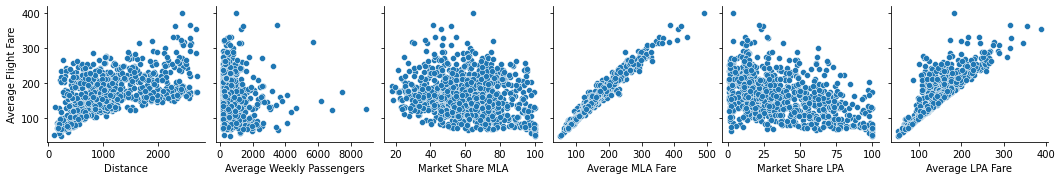

In [ ]:
sns.pairplot(file, y_vars='Average Flight Fare', x_vars=["Distance", "Average Weekly Passengers",
                                                       'Market Share MLA', 'Average MLA Fare','Market Share LPA','Average LPA Fare'
                                                        ])
plt.show()

##### Average Flight fare is most corelated to fare of market leader and low performing flight with mild corelation with Distance as well

##### Variabes need to be scaled before further analysis

##### Transformation seems unnecessary as most data points don't show any clear trend with Average flight Fare.
##### Still checkking effect of log transformation on the data set

In [ ]:
# Log Transformation of independent variables
D1 = np.log(file['Distance'])
D2 = np.log(file['Average Weekly Passengers'])
D3 = np.log(file['Market Share MLA'])
D4 = np.log(file['Average MLA Fare'])
D5 = np.log(file['Market Share LPA'])
D6 = np.log(file['Average LPA Fare'])

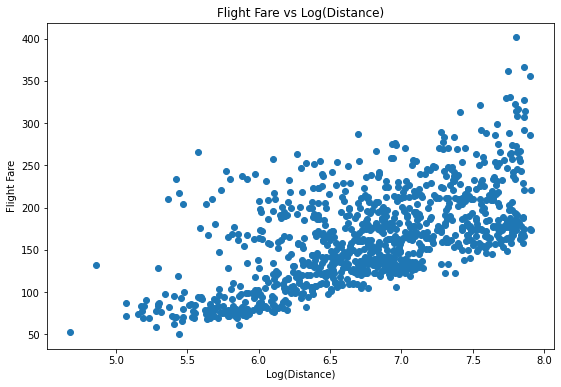

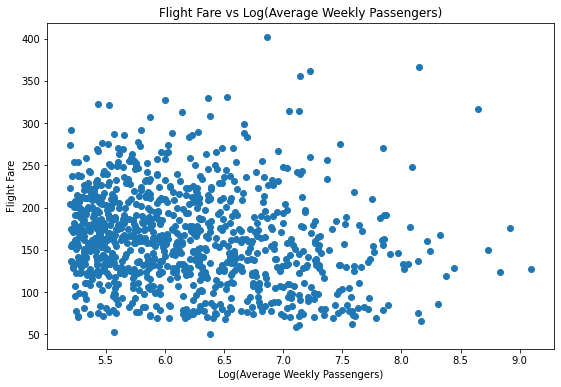

In [ ]:
plt.figure(figsize=(20,6))
plt.subplot(1, 2, 1)
plt.title('Flight Fare vs Log(Distance)')
plt.scatter( D1, file['Average Flight Fare'])
plt.xlabel('Log(Distance)')
plt.ylabel('Flight Fare')


plt.figure(figsize=(20,6))
plt.subplot(1, 2, 2)
plt.title('Flight Fare vs Log(Average Weekly Passengers)')
plt.scatter( D2, file['Average Flight Fare'])
plt.xlabel('Log(Average Weekly Passengers)')
plt.ylabel('Flight Fare')


plt.show()

#### Given Transformation does'nt seem to be adding much value, going forth with raw data only

## 4.2. Multi Linear Regression Model

In [ ]:
# Dropping cities and Flight Name colunm as these are not actionable

In [ ]:
file.drop(['City1'], axis = 1, inplace = True)
file.drop(['City2'], axis = 1, inplace = True)
file.drop(['Market Leading Airline (MLA)'], axis = 1, inplace = True)
file.drop(['Low Price Airline (LPA)'], axis = 1, inplace = True)

###  4.2.1. Splitting Data into Training and Test

In [ ]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
file_train, file_test = train_test_split(file, train_size = 0.7, test_size = 0.3, random_state = 100)

### 4.2.2. Rescaling the Features

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
# Apply scaler() to all the columns except the 'dummy' variables
vars = ['Average Flight Fare', 'Distance', 'Average Weekly Passengers', 'Market Share MLA', 'Average MLA Fare'
            ,'Market Share LPA', 'Average LPA Fare']

file[vars] = scaler.fit_transform(file[vars])

In [ ]:
file.head()

,Average Flight Fare,Distance,Average Weekly Passengers,Market Share MLA,Average MLA Fare,Market Share LPA,Average LPA Fare
0,0.205155,0.287462,0.010882,0.697522,0.165116,0.163432,0.204918
1,0.467338,0.284404,0.003917,0.743562,0.394667,0.017283,0.347324
2,0.053834,0.068807,0.048513,0.963192,0.041728,0.969375,0.056897
3,0.306835,0.235092,0.015010,0.268586,0.252190,0.144330,0.283185
4,0.241368,0.418960,0.002008,0.279397,0.198972,0.162017,0.230781


In [ ]:
file.describe()

,Average Flight Fare,Distance,Average Weekly Passengers,Market Share MLA,Average MLA Fare,Market Share LPA,Average LPA Fare
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,0.321931,0.362960,0.056004,0.515531,0.264347,0.338142,0.276698
std,0.157884,0.245913,0.087448,0.235360,0.142583,0.273773,0.139632
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.215292,0.170489,0.008633,0.350219,0.167459,0.122600,0.189800
50%,0.316045,0.310015,0.025472,0.502672,0.252372,0.253285,0.260751
75%,0.418907,0.514908,0.067149,0.678328,0.347171,0.524459,0.351521
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
y_train = file_train.pop('Average Flight Fare')
X_train = file_train

### 4.2.3. Fitting Regression Model

In [ ]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)
lr_1 = sm.OLS(y_train, X_train_lm).fit()

In [ ]:
print(lr_1.summary())

                             OLS Regression Results                            
Dep. Variable:     Average Flight Fare   R-squared:                       0.974
Model:                             OLS   Adj. R-squared:                  0.974
Method:                  Least Squares   F-statistic:                     4319.
Date:                 Wed, 10 Jul 2024   Prob (F-statistic):               0.00
Time:                         11:10:35   Log-Likelihood:                -2539.2
No. Observations:                  699   AIC:                             5092.
Df Residuals:                      692   BIC:                             5124.
Df Model:                            6                                         
Covariance Type:             nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const       

#### Given Model is able to explain 97% + data, however large number of features have high p value
#### Using VIF to cut down features

In [ ]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Average LPA Fare,38.51
3,Average MLA Fare,36.93
2,Market Share MLA,8.18
0,Distance,6.52
4,Market Share LPA,4.31
1,Average Weekly Passengers,1.65


In [ ]:
# Average lPA fare has highest VIF, dropping it and checking results

In [ ]:
X_new2 = X.drop('Average LPA Fare', 1)

C:\Users\Sam\AppData\Local\Temp\ipykernel_24452\2128817266.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_new2 = X.drop('Average LPA Fare', 1)


In [ ]:
X_new2.head()

,Distance,Average Weekly Passengers,Market Share MLA,Average MLA Fare,Market Share LPA
278,552,251.84,56.58,135.33,25.03
218,1197,593.04,68.85,178.74,12.37
909,647,959.78,60.50,110.14,37.39
718,2217,1002.50,36.21,245.95,16.87
111,868,461.41,48.73,133.15,39.81


In [ ]:
X_train_lm = sm.add_constant(X_new2)

lr_4 = sm.OLS(y_train, X_train_lm).fit()

In [ ]:
print(lr_4.summary())

                             OLS Regression Results                            
Dep. Variable:     Average Flight Fare   R-squared:                       0.964
Model:                             OLS   Adj. R-squared:                  0.964
Method:                  Least Squares   F-statistic:                     3762.
Date:                 Wed, 10 Jul 2024   Prob (F-statistic):               0.00
Time:                         11:10:35   Log-Likelihood:                -2648.1
No. Observations:                  699   AIC:                             5308.
Df Residuals:                      693   BIC:                             5336.
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const       

In [ ]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_new2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Average MLA Fare,11.73
2,Market Share MLA,8.13
0,Distance,5.97
4,Market Share LPA,3.32
1,Average Weekly Passengers,1.65


In [ ]:
# Market Share has a high p value and a High VIF
X_new2 = X.drop('Market Share MLA', 1)

C:\Users\Sam\AppData\Local\Temp\ipykernel_24452\1779592850.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_new2 = X.drop('Market Share MLA', 1)


In [ ]:
X_new2.head()

,Distance,Average Weekly Passengers,Average MLA Fare,Market Share LPA
278,552,251.84,135.33,25.03
218,1197,593.04,178.74,12.37
909,647,959.78,110.14,37.39
718,2217,1002.50,245.95,16.87
111,868,461.41,133.15,39.81


In [ ]:
X_train_lm = sm.add_constant(X_new2)

lr_4 = sm.OLS(y_train, X_train_lm).fit()

In [ ]:
print(lr_4.summary())

                             OLS Regression Results                            
Dep. Variable:     Average Flight Fare   R-squared:                       0.964
Model:                             OLS   Adj. R-squared:                  0.964
Method:                  Least Squares   F-statistic:                     4707.
Date:                 Wed, 10 Jul 2024   Prob (F-statistic):               0.00
Time:                         11:10:35   Log-Likelihood:                -2648.3
No. Observations:                  699   AIC:                             5307.
Df Residuals:                      694   BIC:                             5329.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const       

In [ ]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_new2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Average MLA Fare,6.59
0,Distance,5.43
3,Market Share LPA,1.81
1,Average Weekly Passengers,1.63


In [ ]:
# Market Share LPA has a high p value
X_new3 = X.drop('Market Share LPA', 1)

C:\Users\Sam\AppData\Local\Temp\ipykernel_24452\2976652604.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_new3 = X.drop('Market Share LPA', 1)


In [ ]:
X_train_lm = sm.add_constant(X_new3)

lr_4 = sm.OLS(y_train, X_train_lm).fit()

In [ ]:
print(lr_4.summary())

                             OLS Regression Results                            
Dep. Variable:     Average Flight Fare   R-squared:                       0.964
Model:                             OLS   Adj. R-squared:                  0.964
Method:                  Least Squares   F-statistic:                     6261.
Date:                 Wed, 10 Jul 2024   Prob (F-statistic):               0.00
Time:                         11:10:36   Log-Likelihood:                -2649.6
No. Observations:                  699   AIC:                             5307.
Df Residuals:                      695   BIC:                             5325.
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const       

In [ ]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_new3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Average MLA Fare,5.95
0,Distance,5.40
1,Average Weekly Passengers,1.51


##### Average MLA fare is the single most important feature. 
##### Distance and Average Weekly Passengers are important to some extent

### 4.2.4. Residual Analysis

In [ ]:
y_train_price = lr_4.predict(X_train_lm)

C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

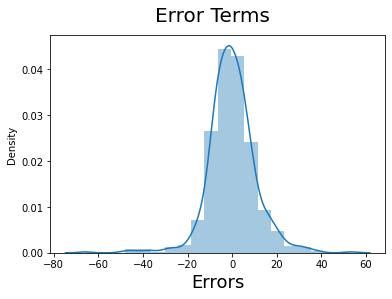

In [ ]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [ ]:
#### Error Terms are normally distributed - hence prediction can be made

### 4.2.5. Making prediction using final model

In [ ]:
num_vars = ['Average Flight Fare', 'Distance','Average Weekly Passengers',
               'Market Share MLA', 'Average MLA Fare', 'Market Share LPA', 'Average LPA Fare']

file_test[num_vars] = scaler.transform(file_test[num_vars])

In [ ]:
y_test = file_test.pop('Average Flight Fare')
X_test = file_test

In [ ]:
# Adding constant variable to test dataframe
X_test_m4 = sm.add_constant(X_test)

In [ ]:
X_test_m4 = X_test_m4.drop(["Market Share MLA", "Market Share LPA", "Average LPA Fare"], axis = 1)

In [ ]:
y_pred_m4 = lr_4.predict(X_test_m4)

Text(0, 0.5, 'y_pred')

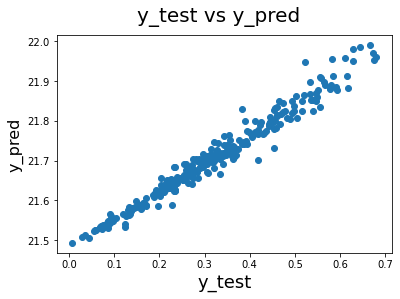

In [ ]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m4)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

In [ ]:
from sklearn import metrics
metrics.explained_variance_score(y_test, y_pred_m4)

0.9059274382628868

####  Model is able to explain 90% + of variance in test data  & 96% + variance in train data


# 5. Other Models that can be applied

##### 1. Polynomian Regression to capture non linearity in data
##### 2. Decision Tree with Regression at nodes (ensemble model)


# 6. Other ways of improving data:
    
    

##### 1. Better independent variables can be derived. Some independent variables include:
        a. Average MlA Fare / Distance b. Average LPA Fare / Distance c. Average MLA fare / Number of passengers d. Average 
            LPA fare / Number of passengers
##### 2. Completely new dependent variables can be introduced like:
        b. Number of flights plying on each route 

##### 3. PCA can identify better independent variable with minimum co-relation



# 7. Conclusion

##### 1. As for Multivariate Analysis, Average MLA Fare is the most important independent variable. 
##### 2. Distance and Average Weekly passenger count also effect Flight charges
##### 3. Multivariate analysis gives decent modl with more than 90% R2 on test data set
##### 4. Accuracy (read R2) can be improved further using features explained above (using alternated model or adding more variables)
##### 5. Transformations like log can improve model accuracy slightly but still effect of Average MLA stays most significant

#### Understanding from EDA:

##### 1. Most of the flight fare lie between 100 to 300 with some outliers
##### 2. Average distance ranges between 500 to 2500
##### 3. Most of the time Average Weekly Passenger numer is less than 2000 but there are large number of outliers  
##### 4. Average fare of both Market Leader and Low Price Airline range from 100 to 300 with some outliers
##### 5. Market Leader has 40 to 80 percent market share on most routes
##### 6. Lower Price airline has less than 40 percent market share on most of the routes
##### 7. Most flights have comparable median flight fare with some having very low values
##### 8. Flight fare of market leading airline and Low Price airline seem to fall in similar range